In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [33]:
cars=pd.read_csv("D:\DS videos\data\cars.csv")

In [34]:
cars.head()

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [35]:
cars.isnull().sum()

car_model    0
mpg          0
cyl          0
disp         0
hp           0
drat         0
wt           0
qsec         0
vs           0
am           0
gear         0
carb         0
dtype: int64

In [36]:
cars.shape

(32, 12)

In [37]:
cars.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


<AxesSubplot:>

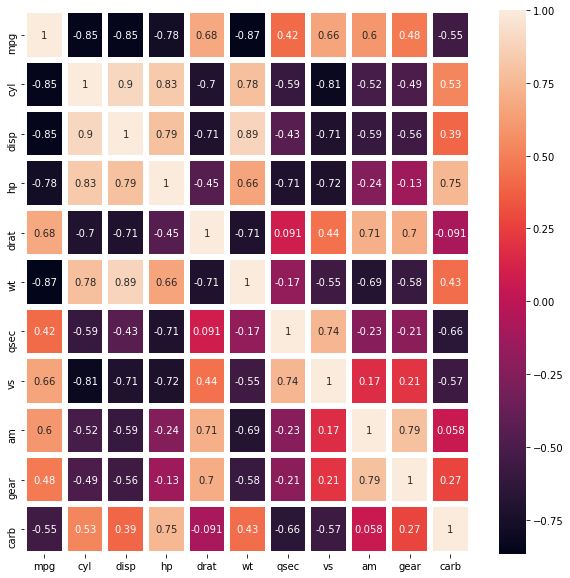

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(cars.corr(), annot=True, linewidth=5)

In [39]:
x=cars.iloc[:,[4,5,6,7,9,10,11]]
y=cars.iloc[:,1]

In [40]:
x.head()

,hp,drat,wt,qsec,am,gear,carb
0,110,3.90,2.620,16.46,1,4,4
1,110,3.90,2.875,17.02,1,4,4
2,93,3.85,2.320,18.61,1,4,1
3,110,3.08,3.215,19.44,0,3,1
4,175,3.15,3.440,17.02,0,3,2


In [41]:
y.head()

0    21.0
1    21.0
2    22.8
3    21.4
4    18.7
Name: mpg, dtype: float64

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.30, random_state=42)

In [44]:
x_train.shape

(22, 7)

In [45]:
y_train.shape

(22,)

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
model=LinearRegression()

In [48]:
model_lr=model.fit(x_train,y_train)

In [49]:
y_pred=model_lr.predict(x_test)

In [50]:
y_pred

array([19.92369036, 10.38836399, 15.51491385, 27.54704165, 25.12078546,
       19.67689252, 13.77021658, 27.83367007, 15.82229391, 22.16192951])

In [51]:
y_test

29    19.7
15    10.4
24    19.2
17    32.4
8     22.8
9     19.2
30    15.0
25    27.3
12    17.3
0     21.0
Name: mpg, dtype: float64

In [52]:
from sklearn.metrics import r2_score

In [53]:
r2_score(y_test,y_pred)

0.8583962985868732

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mpg'>

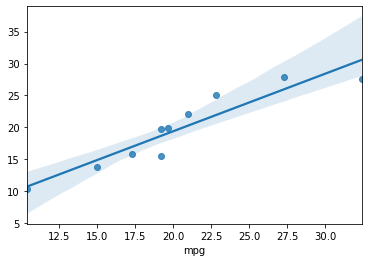

In [54]:
sns.regplot(y_test, y_pred)

In [55]:
model_lr.coef_

array([-0.01561496,  1.21203855, -2.73441916,  0.76840818,  1.47793068,
        0.94295351, -0.33950748])

In [56]:
model_lr.intercept_

9.777089062732424

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [59]:
print("MSE", mean_squared_error(y_test,y_pred))

MSE 4.812557556596668


In [60]:
print("MAE", mean_absolute_error(y_test,y_pred))

MAE 1.5974137939234034


In [61]:
print("RMSE", np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 2.1937542151746783


In [63]:
model_lr.predict([[120,4.90,4.75,18,5,6,10]])

array([24.33743914])

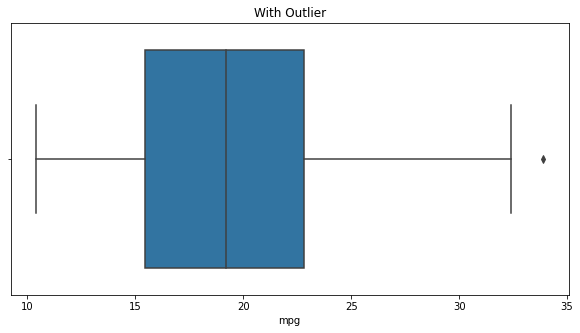

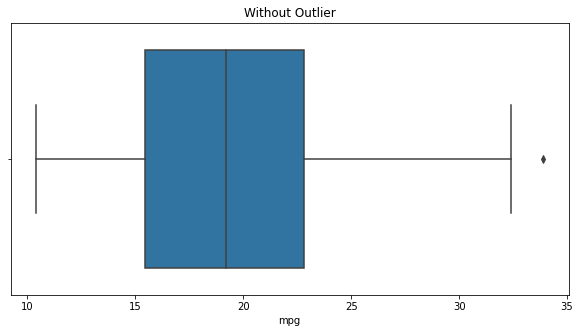

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


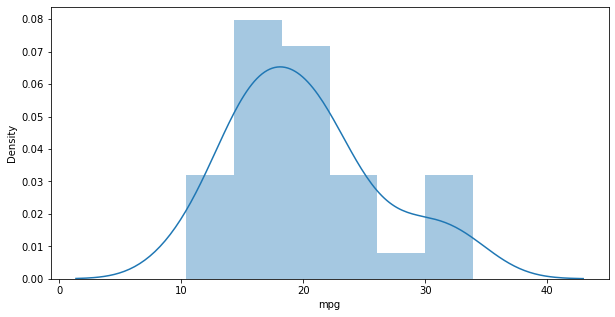

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.title('With Outlier')
sns.boxplot(x=cars['mpg'])
plt.show()

Q1 = cars['mpg'].quantile(0.25)
Q3 = cars['mpg'].quantile(0.75)
IQR = Q3 - Q1

cars = cars[~((cars['mpg'] < (Q1 - 1.5 * IQR)) &(cars['mpg'] > (Q3 + 1.5 * IQR)))]

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.title('Without Outlier')
sns.boxplot(x=cars['mpg'])
plt.show()

plt.figure(figsize=(10,5))
sns.distplot(cars['mpg']);
plt.show()